In [34]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oAnxta94LlKVCPfY0LQ66sVpxiDW8-SAeR93BjCQhGql',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'nutritionaiagent-donotdelete-pr-kiiibiqntitp7v'
object_key = 'sample_nutrition_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)


,Food Item,Calories,Tags,Suitable For
0,Millet Upma,210,"vegetarian, gluten-free",weight_loss
1,Grilled Chicken,250,"non-veg, high_protein",muscle_gain
2,Paneer Salad,280,"vegetarian, dairy",muscle_gain
3,Brown Rice + Dal,300,"vegetarian, wholegrain",general_health
4,Veg Salad,180,"vegetarian, low_calorie",weight_loss


In [35]:
# User input simulation
user_goal = "weight_loss"
user_allergies = ["dairy"]
user_preferences = ["vegetarian"]

# Filter meals based on goal
filtered = df_1[df_1["Suitable For"] == user_goal]

# Remove foods with allergens
def is_safe(tags, allergies):
    return all(a.lower() not in tags.lower() for a in allergies)

filtered = filtered[filtered["Tags"].apply(lambda x: is_safe(x, user_allergies))]

# Filter based on preference
def match_preferences(tags, prefs):
    return any(p.lower() in tags.lower() for p in prefs)

filtered = filtered[filtered["Tags"].apply(lambda x: match_preferences(x, user_preferences))]

# Show result
filtered.reset_index(drop=True, inplace=True)
filtered


,Food Item,Calories,Tags,Suitable For
0,Millet Upma,210,"vegetarian, gluten-free",weight_loss
1,Veg Salad,180,"vegetarian, low_calorie",weight_loss


In [36]:
# Install transformers (only once needed)
!pip install transformers --quiet

# Hide tokenizer warning
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


In [37]:
# Example goal: "weight_loss"
user_goal = "weight_loss"

# Use df_1 because that's the name of your dataset loaded from IBM Cloud
filtered = df_1[df_1['Suitable For'].str.contains(user_goal, case=False)]
filtered.reset_index(drop=True, inplace=True)

# Show the result to verify
filtered.head()


,Food Item,Calories,Tags,Suitable For
0,Millet Upma,210,"vegetarian, gluten-free",weight_loss
1,Veg Salad,180,"vegetarian, low_calorie",weight_loss


In [38]:
from transformers import pipeline, set_seed

# Load the AI model
generator = pipeline("text-generation", model="distilgpt2")
set_seed(42)

# Get the first filtered meal
meal = filtered.iloc[0]['Food Item']
tags = filtered.iloc[0]['Tags']
goal = filtered.iloc[0]['Suitable For']

# Build the prompt
prompt = (
    f"Suggest why '{meal}' is a healthy food choice for someone trying to achieve {goal}.\n"
    f"It is {tags} and commonly recommended because"
)

# Generate AI suggestion
response = generator(
    prompt,
    max_new_tokens=60,
    do_sample=True,
    temperature=0.7,
    top_k=50,
    pad_token_id=50256
)

# Show output
print("🤖 AI Suggestion:\n", response[0]['generated_text'])


Device set to use cpu


🤖 AI Suggestion:
 Suggest why 'Millet Upma' is a healthy food choice for someone trying to achieve weight_loss.
It is vegetarian, gluten-free and commonly recommended because of its high calorie content.
However, there is also a huge need for healthy, healthy food.
How to Find the Healthy Millet Upma
Check out our free guide to find the Healthy Millet Upma, a vegan food and nutrition guide to find the Healthy Millet Upma


In [40]:
!pip install transformers torch torchvision pillow --quiet


In [41]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oAnxta94LlKVCPfY0LQ66sVpxiDW8-SAeR93BjCQhGql',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'nutritionaiagent-donotdelete-pr-kiiibiqntitp7v'
object_key = 'burger.webp'

# load data of type "image/webp" into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']




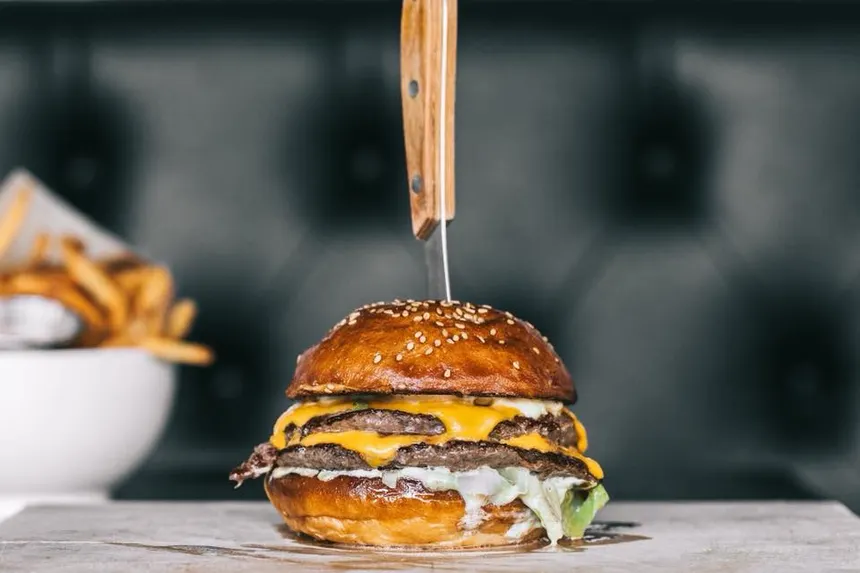

🍔 Predicted: cheeseburger
⚠️ Usually high in fats. Try grilled or veggie versions.


In [45]:
# --- Burger ---
body = cos_client.get_object(Bucket=bucket, Key='burger.webp')['Body']
img = Image.open(io.BytesIO(body.read())).convert("RGB")
display(img)

inputs = processor(images=img, return_tensors="pt")
pred = model(**inputs).logits.argmax(-1).item()
label = model.config.id2label[pred]

print(f"🍔 Predicted: {label}")
print("⚠️ Usually high in fats. Try grilled or veggie versions.")


In [23]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oAnxta94LlKVCPfY0LQ66sVpxiDW8-SAeR93BjCQhGql',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'nutritionaiagent-donotdelete-pr-kiiibiqntitp7v'
object_key = 'pizza.webp'

# load data of type "image/webp" into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

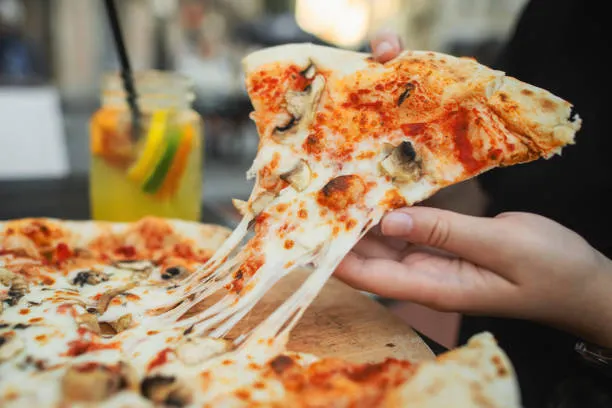

🍕 Predicted: pizza, pizza pie
⚠️ Try thin crust with more veggies for a healthier choice.


In [46]:
# --- Pizza ---
body = cos_client.get_object(Bucket=bucket, Key='pizza.webp')['Body']
img = Image.open(io.BytesIO(body.read())).convert("RGB")
display(img)

inputs = processor(images=img, return_tensors="pt")
pred = model(**inputs).logits.argmax(-1).item()
label = model.config.id2label[pred]

print(f"🍕 Predicted: {label}")
print("⚠️ Try thin crust with more veggies for a healthier choice.")


In [42]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oAnxta94LlKVCPfY0LQ66sVpxiDW8-SAeR93BjCQhGql',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'nutritionaiagent-donotdelete-pr-kiiibiqntitp7v'
object_key = 'salad.webp'

# load data of type "image/webp" into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']


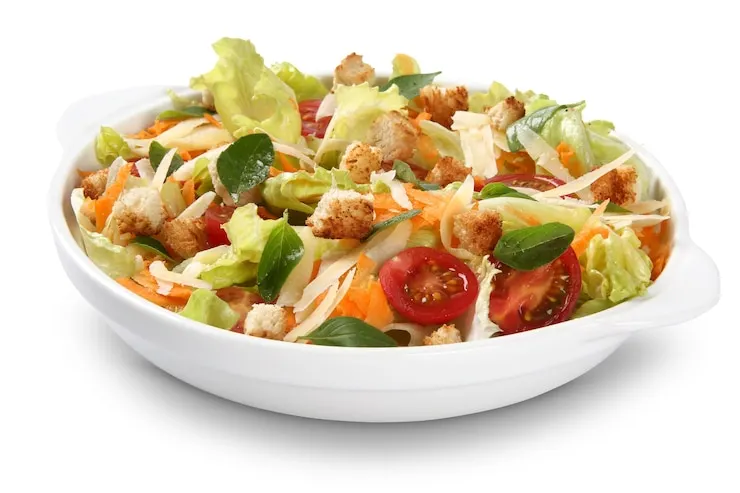

🥗 Predicted: plate
✅ Excellent choice! Full of fiber and nutrients.


In [47]:
# --- Salad ---
body = cos_client.get_object(Bucket=bucket, Key='salad.webp')['Body']
img = Image.open(io.BytesIO(body.read())).convert("RGB")
display(img)

inputs = processor(images=img, return_tensors="pt")
pred = model(**inputs).logits.argmax(-1).item()
label = model.config.id2label[pred]

print(f"🥗 Predicted: {label}")
print("✅ Excellent choice! Full of fiber and nutrients.")



🖼️ Processing: burger.webp


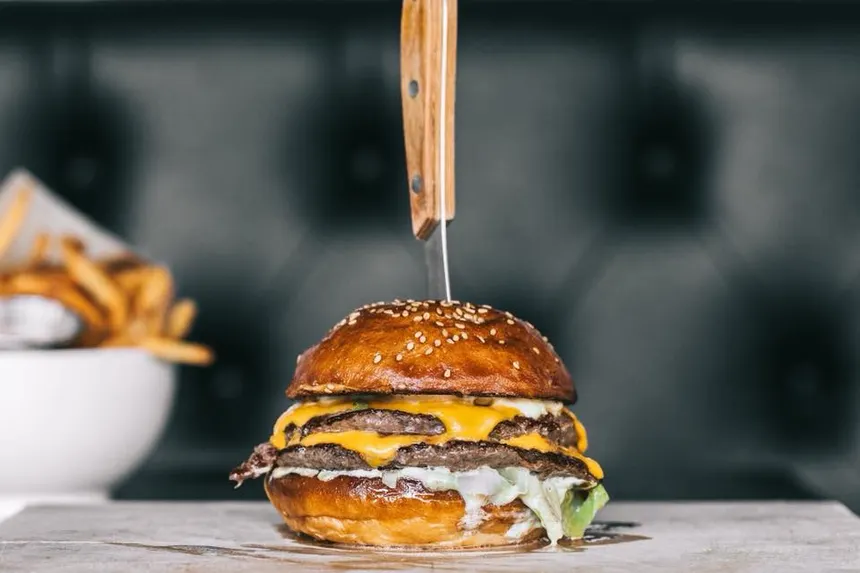

🍽️ Predicted Food: cheeseburger
⚠️ High in fats. Try a grilled or veggie burger.

🖼️ Processing: pizza.webp


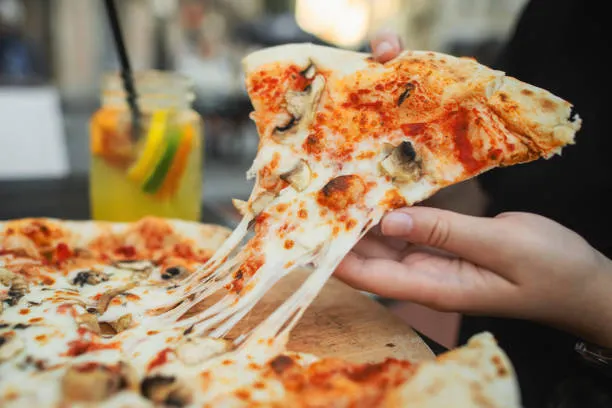

🍽️ Predicted Food: pizza, pizza pie
⚠️ Rich in cheese. Thin crust + veggies = better!

🖼️ Processing: salad.webp


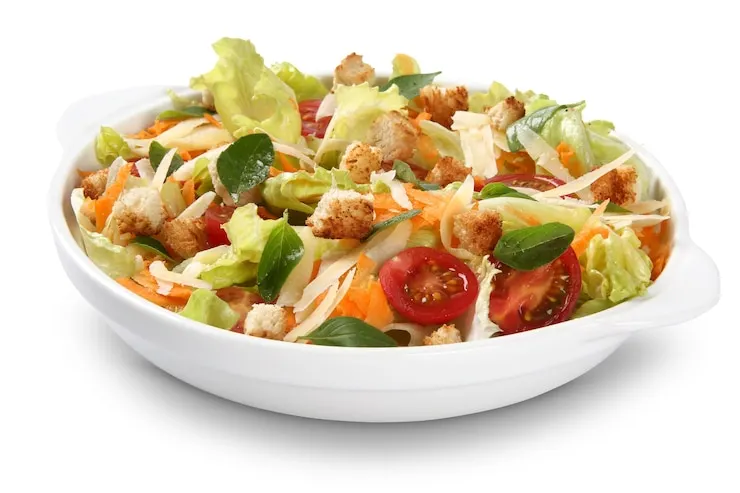

🍽️ Predicted Food: plate
ℹ️ Suggest checking ingredients and portions.


In [29]:
from PIL import Image
import torch
from transformers import AutoImageProcessor, AutoModelForImageClassification
import io
import ibm_boto3
from botocore.client import Config

# Setup IBM COS client
cos_client = ibm_boto3.client(
    service_name='s3',
    ibm_api_key_id='oAnxta94LlKVCPfY0LQ66sVpxiDW8-SAeR93BjCQhGql',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-gb.cloud-object-storage.appdomain.cloud'
)

bucket = 'nutritionaiagent-donotdelete-pr-kiiibiqntitp7v'
image_keys = ['burger.webp', 'pizza.webp', 'salad.webp']  # All uploaded images

# Load model and processor
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")

# Loop through all images
for key in image_keys:
    print(f"\n🖼️ Processing: {key}")
    
    # Read image from COS
    response = cos_client.get_object(Bucket=bucket, Key=key)
    image_stream = response['Body']
    image = Image.open(io.BytesIO(image_stream.read())).convert("RGB")

    # Predict
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        pred_idx = logits.argmax(-1).item()
        label = model.config.id2label[pred_idx]

    # Display results
    display(image)
    print(f"🍽️ Predicted Food: {label}")

    # Health Suggestion
    if "burger" in label.lower():
        print("⚠️ High in fats. Try a grilled or veggie burger.")
    elif "pizza" in label.lower():
        print("⚠️ Rich in cheese. Thin crust + veggies = better!")
    elif "salad" in label.lower():
        print("✅ Great choice! Low-calorie and nutrient-rich.")
    else:
        print("ℹ️ Suggest checking ingredients and portions.")
